<a href="https://colab.research.google.com/github/chidosky4ril/SPSR/blob/master/L00163252_DiCANet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DiCANet: Discriminative Context-Aware Network Camouflage Object Detection**. 

*Student Details:* 
L00163252, Chidiebere Somadina Ike

## ***Prepare workspace***

In [1]:
# Mount Google Drive on Colab Workspace
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ***Adaptive Restoration Block (ARB)***

In [2]:
# Adaptive Restoration Block Working Directory
%cd /content/drive/MyDrive/DiCANet/ARB-Net/net

/content/drive/MyDrive/DiCANet/ARB-Net/net


In [ ]:
# Training ARB model
!python main.py --net='ffa' --crop --crop_size=240 --blocks=19 --gps=3 --bs=2 --lr=0.0001 --trainset='ots_train' --testset='ots_test' --steps=20 --eval_step=2

Namespace(blocks=19, bs=2, crop=True, crop_size=240, device='cuda', eval_step=2, gps=3, lr=0.0001, model_dir='./trained_models/ots_train_ffa_3_19.pk', net='ffa', no_lr_sche=False, perloss=False, resume=True, steps=20, testset='ots_test', trainset='ots_train')
model_dir: ./trained_models/ots_train_ffa_3_19.pk
2
/content/drive/MyDrive/DiCANet/ARB-Net/net
crop size 240
crop size whole img
log_dir : logs/ots_train_ffa_3_19
model_name: ots_train_ffa_3_19
train from scratch *** 
train loss : 0.55933| step :2/20|lr :0.0000976 |time_used :0.2
step :2 |ssim:0.2860| psnr:9.2984

 model saved at step :2| max_psnr:9.2984|max_ssim:0.2860
train loss : 0.49110| step :4/20|lr :0.0000905 |time_used :4.9
step :4 |ssim:0.4524| psnr:9.9772

 model saved at step :4| max_psnr:9.9772|max_ssim:0.4524
train loss : 0.47604| step :6/20|lr :0.0000794 |time_used :6.2
step :6 |ssim:0.4872| psnr:10.3272

 model saved at step :6| max_psnr:10.3272|max_ssim:0.4872
train loss : 0.25432| step :8/20|lr :0.0000655 |time_us

In [ ]:
# Test ARB model on Camouflage Image
# Set path '--test_imgs' for Camouflage images; copy image to path
# Processed image becomes an input to Cascaded Detection Block in next cell
# Uncheck to test ARB on each dataset
#!python test.py --task='ots' --test_imgs='./test_imgs/CHAMELEON' # For CHAMELEON dataset
#!python test.py --task='ots' --test_imgs='./test_imgs/CAMO' # For CAMO dataset
#!python test.py --task='ots' --test_imgs='./test_imgs/COD10K' # For COD10K dataset

## ***Cascaded Detection Block (CDB)***

In [10]:
# Cascaded Detection Block Working Directory
%cd /content/drive/MyDrive/DiCANet/CDB-Net

/content/drive/MyDrive/DiCANet/CDB-Net


In [11]:
# Installing necessary packages
!pip3 install -r requirement.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
# Install apex for Model Training
!git clone https://github.com/NVIDIA/apex
%cd apex
!pip install -v --no-cache-dir ./

Cloning into 'apex'...
remote: Enumerating objects: 10686, done.
remote: Counting objects: 100% (208/208), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 10686 (delta 120), reused 123 (delta 64), pack-reused 10478
Receiving objects: 100% (10686/10686), 15.21 MiB | 8.82 MiB/s, done.
Resolving deltas: 100% (7346/7346), done.
Checking out files: 100% (420/420), done.
/content/drive/MyDrive/DiCANet/CDB-Net/apex
Using pip 21.1.3 from /usr/local/lib/python3.8/dist-packages/pip (python 3.8)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/p

In [13]:
%cd /content/drive/MyDrive/DiCANet/CDB-Net

/content/drive/MyDrive/DiCANet/CDB-Net


In [ ]:
# Train Model. Modify all configuration files, Train data path etc
!python MyTrain.py

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
[INFO] initialize weights from resnet50
/usr/local/lib/python3.8/dist-packages/apex/__init__.py:68: DeprecatedFeatureWarning: apex.amp is deprecated and will be removed by the end of February 2023. Use [PyTorch AMP](https://pytorch.org/docs/stable/amp.html)
  warnings.warn(msg, DeprecatedFeatureWarning)
Selected optimization level O1:  Insert automatic casts around Pytorch fun

## ***Qualitative Evaluation Section - Camouflaged Object-Level Segmentation***

In [14]:
# Segmentation Directory
%cd /content/drive/MyDrive/DiCANet/CDB-Net

/content/drive/MyDrive/DiCANet/CDB-Net


In [ ]:
# Check if CUDA is available
import torch
import os
if __name__ == "__main__":
     os.environ['CUDA_VISIBLE_DEVICES'] = '0'
     print(torch.cuda.is_available())

True


In [ ]:
# Test DiCANet model to Generate object-level segmentation
!python MyTest.py

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
[INFO] initialize weights from resnet50
/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:3734: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
[Eval-Test] Dataset: COD10K, Image: COD10K-CAM-1-Aquatic-1-BatFish-2.png (1/2026), MA

## ***Quantitative Evaluation Section - `Smeasure, mEmeasure, wFmeasure, and MAE`***

In [1]:
# Evaluation directory
%cd /content/drive/MyDrive/DiCANet/CDB-Net/PySODMetrics

/content/drive/MyDrive/DiCANet/CDB-Net/PySODMetrics


In [2]:
# Retrieves metrics content from web servers
# If prompted to "restart runtime", please do and rerun this cell after re-runing Evaluation directory
!wget -nc -O metrics.py https://raw.githubusercontent.com/lartpang/PySODMetrics/main/py_sod_metrics/sod_metrics.py
# maybe, you need: please uncheck
!pip install -r requirements.txt

File ‘metrics.py’ already there; not retrieving.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# PySODMetrics: A simple and efficient implementation of SOD metrics
!pip install pysodmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# PySODMetrics working directory
%cd /content/drive/MyDrive/DiCANet/CDB-Net/PySODMetrics/examples

/content/drive/MyDrive/DiCANet/CDB-Net/PySODMetrics/examples


## ***Quantitative Results***

In [ ]:
# Move all DiCANet segmentation result from "./DiCANet/CDB-Net/result/CDB_Seg" folder into
# /PySODMetrics/examples/test_data/DiCANet for evaluation.

In [ ]:
# Quantitative measures on CHAMELEON Dataset
!python test_metrics.py

100% 76/76 [00:53<00:00,  1.42it/s]
{'Smeasure': 0.8710091761743438, 'wFmeasure': 0.8052805730432706, 'MAE': 0.03405616184143362, 'adpEm': 0.9387851603418571, 'meanEm': 0.9364173428796654, 'maxEm': 0.946071169133741, 'adpFm': 0.8250383612032236, 'meanFm': 0.8271893306707854, 'maxFm': 0.8381731926982218}


In [ ]:
# Quantitative measures on CAMO Dataset
!python test_metrics.py

100% 250/250 [00:59<00:00,  4.18it/s]
{'Smeasure': 0.7466350040233183, 'wFmeasure': 0.6467024877043339, 'MAE': 0.09121920901796611, 'adpEm': 0.824683907686895, 'meanEm': 0.8038682667670096, 'maxEm': 0.8282172690851218, 'adpFm': 0.7147827083641126, 'meanFm': 0.704916212994205, 'maxFm': 0.7104951572680117}


In [ ]:
# Quantitative measures on COD10K Dataset
!python test_metrics.py

100% 2026/2026 [09:07<00:00,  3.70it/s]
{'Smeasure': 0.7749934907596532, 'wFmeasure': 0.6284589723183102, 'MAE': 0.04301986751575925, 'adpEm': 0.8646774289085126, 'meanEm': 0.8626974661503903, 'maxEm': 0.8720597662630794, 'adpFm': 0.6645332217983813, 'meanFm': 0.677235834917409, 'maxFm': 0.6892335137307524}


## *Challenging Scenario - Occlusion Case*
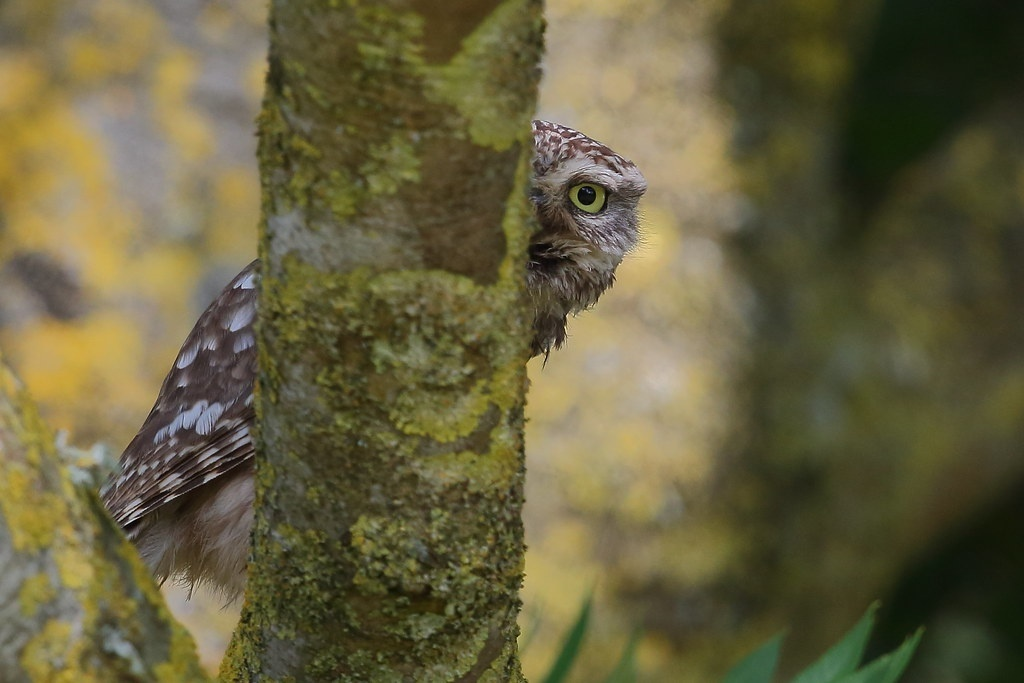

## *Ground Truth Segmentation map*
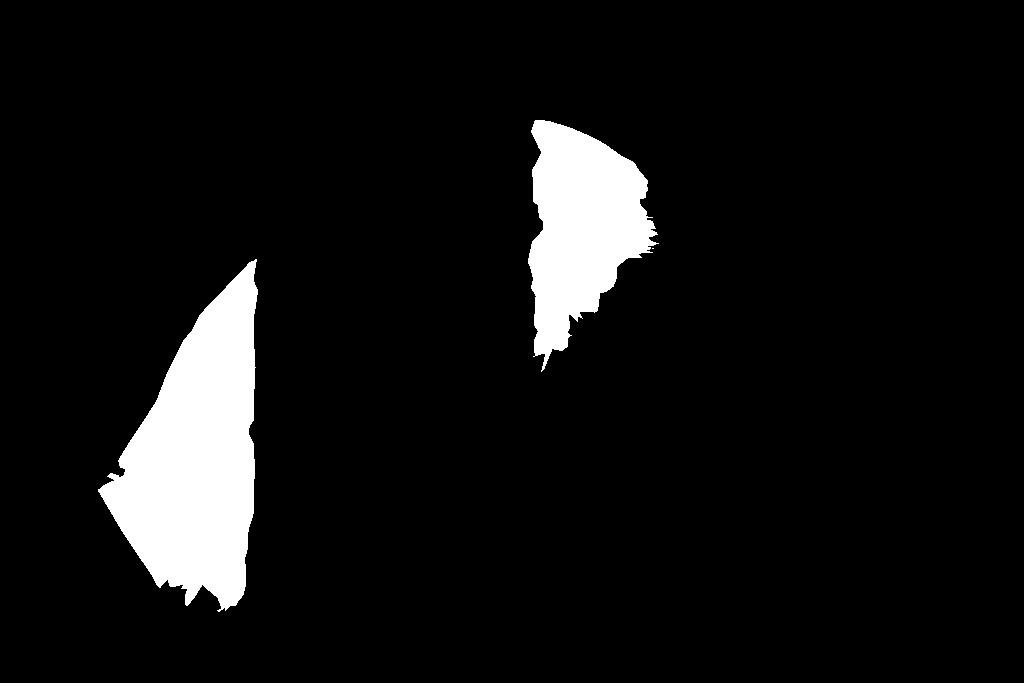

In [5]:
# Quantitative measures on - SINet (Occlusion)
!python test_metrics.py

100% 1/1 [00:01<00:00,  1.12s/it]
{'Smeasure': 0.8032991166091228, 'wFmeasure': 0.8454419442657475, 'MAE': 0.01693699109859903, 'adpEm': 0.9670201002469038, 'meanEm': 0.9693273792118207, 'maxEm': 0.9922810240718265, 'adpFm': 0.8400436168428115, 'meanFm': 0.8784666160949159, 'maxFm': 0.9411064604767078}


*SINet Camouflage Segmentation map - Occlusion Case*




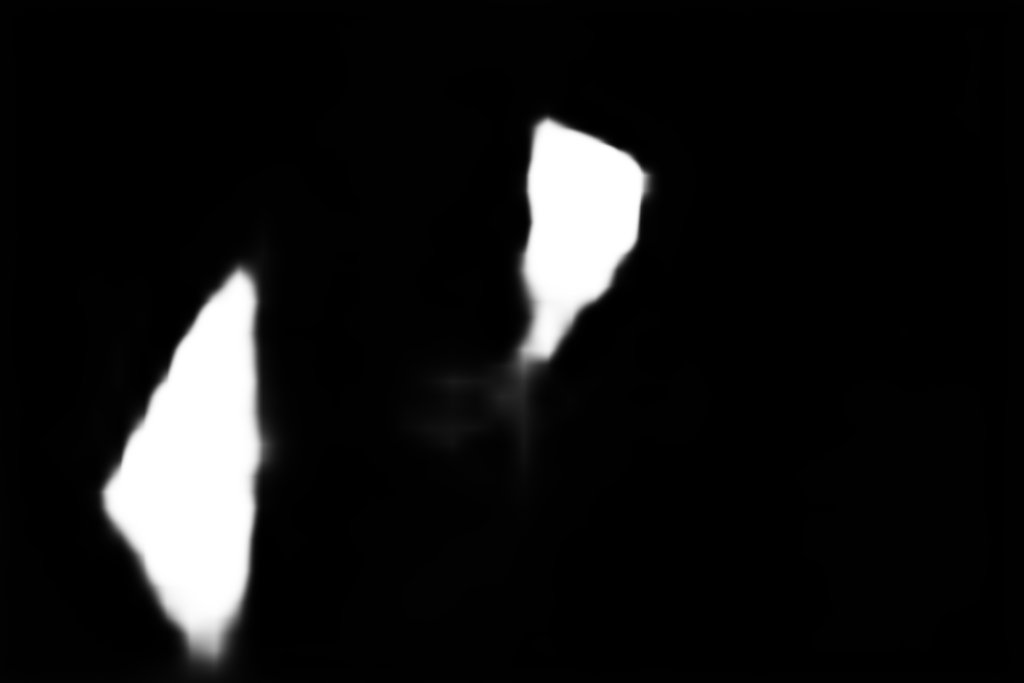

In [8]:
# Quantitative measures on - DiCANet (Occlusion)
!python test_metrics.py

100% 1/1 [00:00<00:00,  1.79it/s]
{'Smeasure': 0.8038825252962826, 'wFmeasure': 0.9153120935383288, 'MAE': 0.010145736666738438, 'adpEm': 0.98788687721008, 'meanEm': 0.9868365291327997, 'maxEm': 0.9926590097594722, 'adpFm': 0.9084246546287524, 'meanFm': 0.9163800913551879, 'maxFm': 0.9479377271356705}


## *DiCANet (Ours) Segmentation Map*
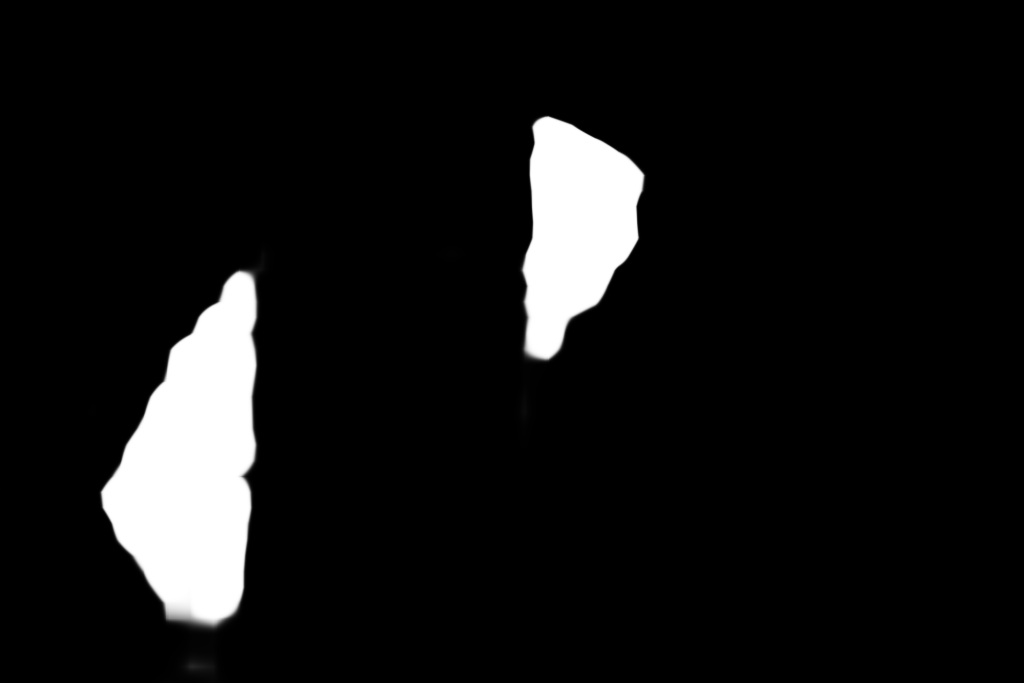